In [2]:
import sklearn.datasets
import numpy as np
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape, Y.shape)
import pandas as pd
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.head()
data.describe()
print(data['class'].value_counts())
print(breast_cancer.target_names)
data.groupby('class').mean()


(569, 30) (569,)
1    357
0    212
Name: class, dtype: int64
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [3]:
#Train test split
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
Y = data['class']
type(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(Y.shape, Y_train.shape, Y_test.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(Y.mean(), Y_train.mean(), Y_test.mean())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)
print(X_train.mean(), X_test.mean(), X.mean())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)
print(X_train.mean(), X_test.mean(), X.mean())


(569,) (426,) (143,)
0.6274165202108963 0.64453125 0.47368421052631576
mean radius                 14.129629
mean texture                19.318418
mean perimeter              92.004023
mean area                  654.999414
mean smoothness              0.096511
mean compactness             0.105085
mean concavity               0.088923
mean concave points          0.049173
mean symmetry                0.181591
mean fractal dimension       0.062904
radius error                 0.407048
texture error                1.216960
perimeter error              2.880644
area error                  40.222734
smoothness error             0.007066
compactness error            0.025712
concavity error              0.031919
concave points error         0.011918
symmetry error               0.020707
fractal dimension error      0.003836
worst radius                16.274193
worst texture               25.634473
worst perimeter            107.341836
worst area                 880.705078
worst smoothness 

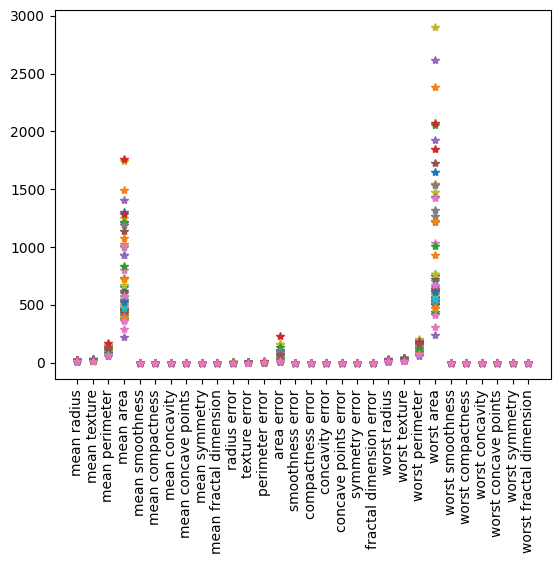

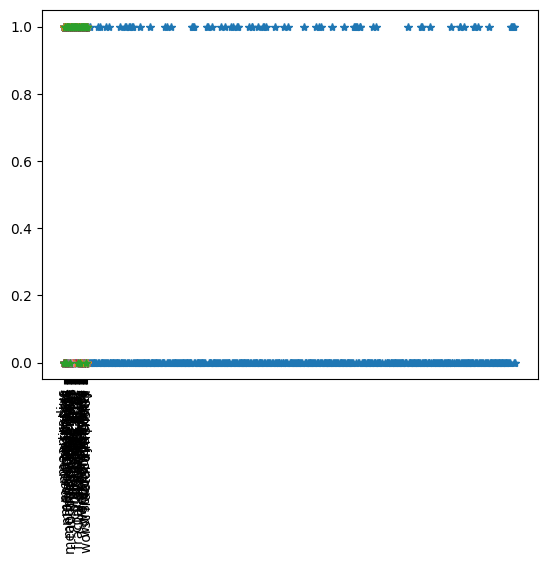

numpy.ndarray

In [4]:
#Binarisation of input
import matplotlib.pyplot as plt
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)
plt.plot(X_binarised_3_train, '*')
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])
type(X_binarised_test)
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values
type(X_binarised_test)


In [16]:

#MP Neuron Class
from sklearn.base import accuracy_score


class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])
    mp_neuron = MPNeuron()
    mp_neuron.fit(X_binarised_train, Y_train)
    Y_test_pred = mp_neuron.predict(X_binarised_test)
    accuracy_test = accuracy_score(Y_test_pred, Y_test)
    print(accuracy_test)

# Output
# Optimal value of b is 28
# Highest accuracy is 0.849609375
# 0.7894736842105263
